## 3- Global graphical analysis and statistics

In this notebook, we will explore some of NILMTK's functions for quick dataset diagnostics. We'll also look at functions for obtaining statistical data based on energy usage and consumption of the elements.

First, we need to load libraries like pandas, matplotlib, nilmtk and SVG.

We'll also make some additional adjustments:


In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from nilmtk import DataSet, TimeFrame
import warnings
from IPython.display import SVG

warnings. filterwarnings("ignore")
plt.style.use('bmh')



Now we load the dataset and associate the labels for the graphics

In [2]:
#dataset de referencia 
deps = DataSet('dsualmh.h5')



elec=deps.buildings[1].elec # Todos los medidores

print (elec)

labels = pd.DataFrame({'Instances': list(range(1,12)),
                       'Meters': ['Main', 'Electric furnace', 'Microwave','Television','Incandescent lamp','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer']})

Meters={}
for x in range(len(labels)): Meters[elec[x+1]]=labels['Meters'][x] 
    
print(Meters)


#etiquetas eje x en algunos graficos
days = [  '2023-06-09 09:34:38+02:00','2023-06-09 13:36:19+02:00' ]

colors_1 = ['tab:red','tab:brown','tab:gray','tab:pink','tab:blue','tab:orange','tab:green','tab:yellow','tab:black','tab:purple','tab:grey','tab:brown']
colors_2 = [colors_1[0]]+colors_1[10:]

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='dsualmh', site_meter, appliances=[])
  ElecMeter(instance=2, building=1, dataset='dsualmh', appliances=[Appliance(type='electric furnace', instance=1)])
  ElecMeter(instance=3, building=1, dataset='dsualmh', appliances=[Appliance(type='microwave', instance=1)])
  ElecMeter(instance=4, building=1, dataset='dsualmh', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=5, building=1, dataset='dsualmh', appliances=[Appliance(type='incandescent lamp', instance=1)])
  ElecMeter(instance=6, building=1, dataset='dsualmh', appliances=[Appliance(type='vacuum cleaner', instance=1)])
  ElecMeter(instance=7, building=1, dataset='dsualmh', appliances=[Appliance(type='electric space heater', instance=1)])
  ElecMeter(instance=8, building=1, dataset='dsualmh', appliances=[Appliance(type='electric shower heater', instance=1)])
  ElecMeter(instance=9, building=1, dataset='dsualmh', appliances=[Appliance(type='fan', i

Now we will create graphs with all power data compressed into a single plot:

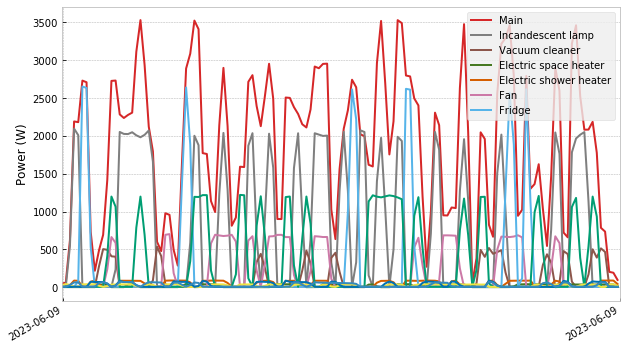

In [3]:
rcParams['figure.figsize'] = (10, 6)

tf1=TimeFrame(start='2023-06-09', end='2023-06-10')
ax=elec.select(instance=[1,2,3,4,5,6,7,8,9,10,11]).plot(timeframe=tf1)
#colores
c=0
for col in colors_2:    
    ax.get_lines()[c].set_color(col)
    c+=1    
#etiquetas
ax.legend([list(Meters.values())[0]]+list(Meters.values())[4:10])
ax.set(xticks=days[:5])
#guarda gráfico
plt.savefig('./data/images/2.5_Plot_all_meters_week1.svg', bbox_inches='tight', transparent=True)
plt.show()
pass

Let's now look at the relationship between the aggregated signal and the sum of individual device measurements using an area plot through a very quick method:

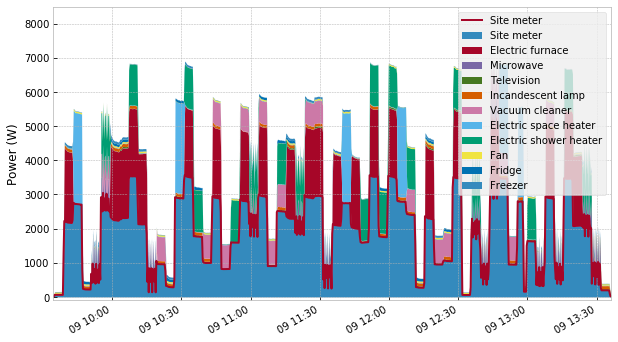

In [4]:

from nilmtk import TimeFrame

t=TimeFrame(start='2023-06-09 09:34:38+02:00', end='2023-06-09 13:36:19+02:00')
elec.select(instance=[1,2,3,4,5,6,7,8,9,10,11]).plot(kind='area',timeframe=t)

ax=elec[1].plot(timeframe=t)

ax.set(ylim=(-100,8500))
pass


In [5]:
colors_2[:11]

['tab:red', 'tab:grey', 'tab:brown']

In [6]:
t0 = '2023-06-09 09:34:38+02:00' #tiempo inicial
t1 = '2023-06-09 13:36:19+02:00' #tiempo final

elec.select(instance=[1,2,3,4,5,6,7,8,9,10,11]).power_series_all_data(ac_type='active', sample_period=60)[t0:t1]

Loading data for meter ElecMeterID(instance=11, building=1, dataset='dsualmh')     
Done loading data all meters for this chunk.


2023-06-09 09:35:00+02:00     149.175766
2023-06-09 09:36:00+02:00     158.396301
2023-06-09 09:37:00+02:00     159.561798
2023-06-09 09:38:00+02:00     156.513626
2023-06-09 09:39:00+02:00    3953.236328
                                ...     
2023-06-09 13:32:00+02:00     398.041565
2023-06-09 13:33:00+02:00     397.234009
2023-06-09 13:34:00+02:00     398.182465
2023-06-09 13:35:00+02:00     338.695404
2023-06-09 13:36:00+02:00      72.967148
Freq: 60S, Name: (power, active), Length: 242, dtype: float32

### Voltage Profile

In [7]:
V1=next(elec[1].load())['voltage']
d = {'Indicador': ['Promedio', 'Máximo', 'Mínimo'],
     'V1':    [round(V1.mean(),1),round(V1.max(),1),round(V1.min(),1)]} #Voltaje R S T mean
     
pd.DataFrame(d)


,Indicador,V1
0,Promedio,type armonic18 0.000000 armonic28 0....
1,Máximo,type armonic18 0.100000 armonic28 0....
2,Mínimo,type armonic18 0.000000 armonic28 0....


In [8]:
V2=next(elec[2].load())['voltage']
V3=next(elec[3].load())['voltage']
V4=next(elec[4].load())['voltage']
V5=next(elec[5].load())['voltage']
V6=next(elec[6].load())['voltage']
V7=next(elec[7].load())['voltage']
V8=next(elec[8].load())['voltage']
V9=next(elec[9].load())['voltage']
V10=next(elec[10].load())['voltage']
V11=next(elec[11].load())['voltage']



In [9]:
d = {'Indicador': ['Promedio', 'Máximo', 'Mínimo'],
     'Horno':    [round(V2.mean(),1), round(V2.mean(),1), round(V2.mean(),1)], #Voltaje horno
     'Microondas':    [round(V3.max(),1),  round(V3.max(),1),  round(V3.max(),1)],  #Voltaje micor
     'Television':    [round(V4.min(),1),  round(V4.min(),1),  round(V4.min(),1)],  #Voltaje tv
     'Hervidor':    [round(V5.min(),1),  round(V5.min(),1),  round(V5.min(),1)],  #Voltaje hervidor
     'Aspiradora':    [round(V6.min(),1),  round(V6.min(),1),  round(V6.min(),1)],  #Voltaje asp
     'Estufa aceite':    [round(V7.min(),1),  round(V7.min(),1),  round(V7.min(),1)], #Voltaje estufa aceite
     'Calentador de agua':    [round(V8.min(),1),  round(V8.min(),1),  round(V8.min(),1)], #Voltaje calentador
     'Ventilador':    [round(V9.min(),1),  round(V9.min(),1),  round(V9.min(),1)], #Voltaje ventilador
     'Nevera':    [round(V10.min(),1),  round(V10.min(),1),  round(V10.min(),1)], #Voltaje nevera
     'Congelador':    [round(V11.min(),1),  round(V11.min(),1),  round(V11.min(),1)] #Voltaje estufa congelador
      } 



pd.DataFrame(d)

,Indicador,Horno,Microondas,Television,Hervidor,Aspiradora,Estufa aceite,Calentador de agua,Ventilador,Nevera,Congelador
0,Promedio,type armonic18 0.000000 armonic28 0....,type armonic18 0.100000 armonic28 0....,type armonic18 0.000000 armonic28 0....,type armonic18 0.000000 armonic28 0....,type armonic18 0.000000 armonic28 0....,type armonic18 0.000000 armonic28 0....,type armonic18 0.000000 armonic28 0....,type armonic18 0.000000 armonic28 0....,type armonic18 0.000000 armonic28 0....,type armonic18 0.000000 armonic28 0....
1,Máximo,type armonic18 0.000000 armonic28 0....,type armonic18 0.100000 armonic28 0....,type armonic18 0.000000 armonic28 0....,type armonic18 0.000000 armonic28 0....,type armonic18 0.000000 armonic28 0....,type armonic18 0.000000 armonic28 0....,type armonic18 0.000000 armonic28 0....,type armonic18 0.000000 armonic28 0....,type armonic18 0.000000 armonic28 0....,type armonic18 0.000000 armonic28 0....
2,Mínimo,type armonic18 0.000000 armonic28 0....,type armonic18 0.100000 armonic28 0....,type armonic18 0.000000 armonic28 0....,type armonic18 0.000000 armonic28 0....,type armonic18 0.000000 armonic28 0....,type armonic18 0.000000 armonic28 0....,type armonic18 0.000000 armonic28 0....,type armonic18 0.000000 armonic28 0....,type armonic18 0.000000 armonic28 0....,type armonic18 0.000000 armonic28 0....


## Voltage Profile Graph

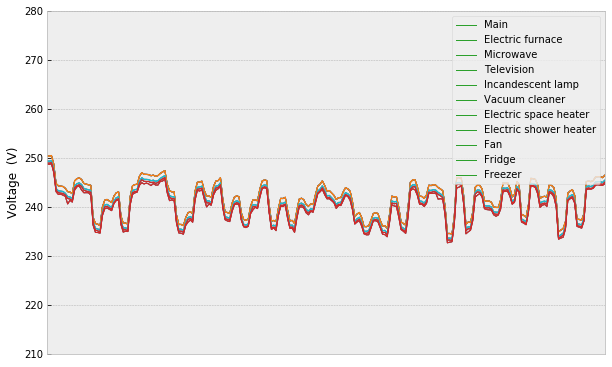

In [10]:
rcParams['figure.figsize'] = (10, 7)

#redimensina el gráfico para reducir tamaño
V1=next(elec[1].load(sample_period=60))['voltage']
V2=next(elec[2].load(sample_period=60))['voltage']
V3=next(elec[3].load(sample_period=60))['voltage']
V4=next(elec[4].load(sample_period=60))['voltage']
V5=next(elec[5].load(sample_period=60))['voltage']
V6=next(elec[6].load(sample_period=60))['voltage']
V7=next(elec[7].load(sample_period=60))['voltage']
V8=next(elec[8].load(sample_period=60))['voltage']
V9=next(elec[9].load(sample_period=60))['voltage']
V10=next(elec[10].load(sample_period=60))['voltage']
V11=next(elec[11].load(sample_period=60))['voltage']


fig, (ax1) = plt.subplots(1, 1, gridspec_kw={'hspace': 0.4})


ta = '2023-06-09 09:34:38+02:00' #tiempo inicial
tb = '2023-06-09 13:36:19+02:00' #tiempo final

V1[ta:tb].plot(ax=ax1, c='tab:green', lw=1)
V2[ta:tb].plot(ax=ax1, c='tab:brown', lw=1)
V3[ta:tb].plot(ax=ax1, c='tab:gray', lw=1)
V4[ta:tb].plot(ax=ax1, c='tab:pink', lw=1)
V5[ta:tb].plot(ax=ax1, c='tab:blue', lw=1)
V6[ta:tb].plot(ax=ax1, c='tab:orange', lw=1)
V7[ta:tb].plot(ax=ax1, c='tab:cyan', lw=1)
V8[ta:tb].plot(ax=ax1, c='tab:purple', lw=1)
V9[ta:tb].plot(ax=ax1, c='tab:grey', lw=1)
V10[ta:tb].plot(ax=ax1, c='tab:brown', lw=1)
V11[ta:tb].plot(ax=ax1, c='tab:red', lw=1)


ax1.legend(list(Meters.values())[0:11], loc='upper right')
ax1.set(ylim=(210,280))
ax1.set(ylabel='Voltage  (V)')
ax1.set(xticks=days[1:])


#guarda gráfico
plt.savefig('./data/images/2.8_voltage_profile.svg', bbox_inches='tight', transparent=True)
plt.show()
pass

### Missing data

Missing data, holes, or gaps are determined by the metadata of each meter type, specifically in the max_sample_period parameter setting. This value indicates the maximum time allowed between measurements before considering the meter is turned off

In [11]:
elec[1].good_sections(full_results=True).combined() #secciones buenas Main_RST

[TimeFrame(start='2023-06-09 09:34:38+02:00', end='2023-06-09 13:36:19+02:00', empty=False)]

Display missing data graphically 

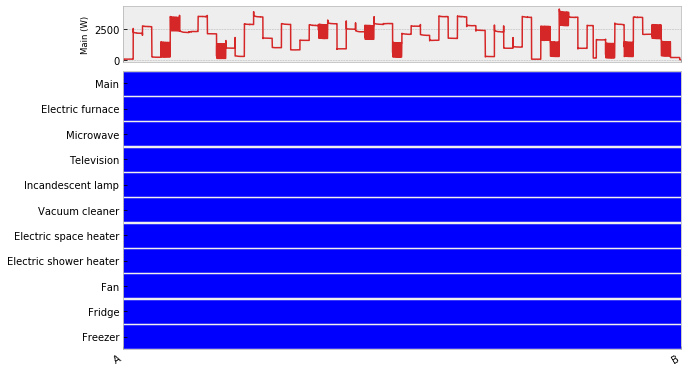

In [12]:
rcParams['figure.figsize'] = (10, 7)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'hspace': 0.05,'height_ratios':[1,5]})

elec[1].power_series_all_data().plot(ax=ax1, c='tab:red', lw=1.5)
ax1.set_ylabel('Main (W)', fontsize=8.5)
ax1.minorticks_off()

elec.plot_good_sections(ax=ax2)
ax2.set_yticklabels(reversed(list(Meters.values())))
ax2.grid(axis='y')
ax2.set(xticks=days)
l=['A','B','C']
ax2.set_xticklabels(l, rotation=30, ha='right')

#guarda gráfico
plt.savefig('./data/images/2.9_good_sections.svg', bbox_inches='tight', transparent=True)
plt.show()
pass

### Dropout Rate and Uptime

#### Dropout Rate 
Without counting when the system does not record data exceeding the maximum sampling time, although data losses are also perceived due to the acquisition system itself, which is called dropout.

The dropout rate is therefore a number between 0 and 1 that specifies the proportion of missing samples. A dropout rate of 0 means no samples are missing and a value of 1 would mean all samples are missing (100%).

#### Uptime
The calculated uptime will be conditioned to the max_sample_period parameter of each meter specified in the metadata. If no data has been recorded after that time, the meter is considered turned off.

In [13]:
a=[]; b=[]; c=[]
for meter, name in Meters.items():
    a.append(name)
    b.append(str(meter.uptime())) #tiempo de funcionamiento
    c.append(round(meter.dropout_rate()*100,1)) #tasa de abandono

a.append('Total')
b.append(str(elec.uptime()))
c.append(round(elec.dropout_rate()*100,1))
    
df=pd.DataFrame(data=[b,c], columns=a, index=['Uptime','Dropout Rate']).transpose()
df

Calculating dropout_rate for ElecMeterID(instance=11, building=1, dataset='dsualmh') ...   

,Uptime,Dropout Rate
Main,0 days 04:01:41,0
Electric furnace,0 days 04:01:41,0
Microwave,0 days 04:01:41,0
Television,0 days 04:01:41,0
Incandescent lamp,0 days 04:01:41,0
Vacuum cleaner,0 days 04:01:41,0
Electric space heater,0 days 04:01:41,0
Electric shower heater,0 days 04:01:41,0
Fan,0 days 04:01:41,0
Fridge,0 days 04:01:41,0


### Activity Log

Time periods where measurements exceed a defined threshold (including peaks).

Color de fondo después:  (1.0, 1.0, 1.0, 1.0)


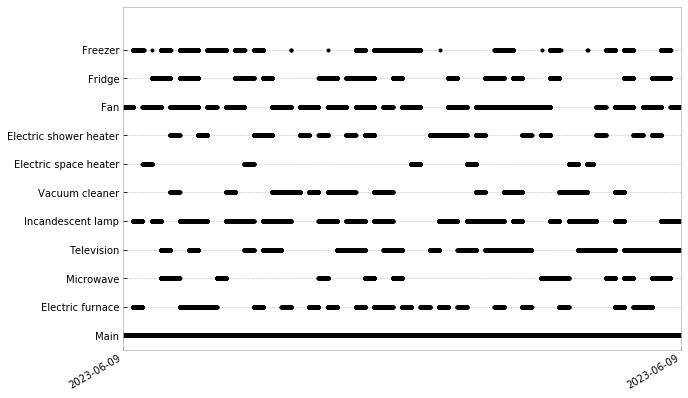

In [14]:
rcParams['figure.figsize'] = (10, 7)

Devices=elec.select(instance=[1,2,3,4,5,6,7,8,9,10,11]) #MeterGroup de dispositivos
ax=Devices.plot_when_on(on_power_threshold=10) #umbral de 80 W

#etiquetas
ax.set_yticklabels(list(Meters.values())[0:11])
ax.set(xticks=days)

#guarda gráfico
plt.savefig('./data/images/2.10_On_power1.pdf', bbox_inches='tight', transparent=True)
plt.savefig('./data/images/2.10_On_power1.png', bbox_inches='tight', transparent=True, dpi=1200)
#formatos savefig: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz, evitar guardar .svg por el tamaño del archivo (50Mb)
plt.show()
pass


### Activity Graphs by Device and Day

Let's now look at the activity graph for each device per day.

In [15]:
colors_1 = ['tab:red','tab:orange','tab:red','tab:blue','tab:grey','tab:pink','tab:green','tab:blue','tab:gray','tab:orange','tab:green','tab:yellow','tab:black','tab:purple','tab:grey','tab:brown']
#colors_1

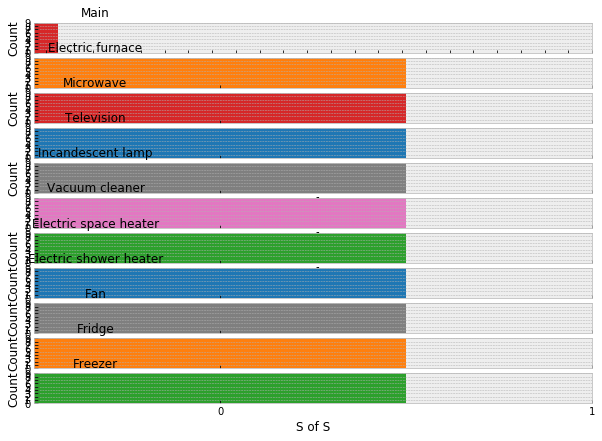

In [16]:
#rcParams['figure.figsize'] = (12, 10)
fig, ((ax1, ax2,ax3, ax4,ax5, ax6,ax7,ax8,ax9,ax10,ax11)) = plt.subplots(11, 1, sharex=True, sharey=True, 
                                                                 gridspec_kw={'hspace': 0.17, 'wspace': 0.09})

m=0



for ax in fig.get_axes(): 
    list(Meters)[m].plot_activity_histogram(ax=ax, period='S', #periodo en segundos
                                            bin_duration='S', #duración en segundos
                                            on_power_threshold=10, #umbral de 10w
                                            plot_kwargs={'color':colors_1[m]})
    #labels
    ttl=ax.set_title(labels['Meters'][m], fontsize=12)
    ttl.set_position([.11, 1])
    m=m+1
    ax.grid(axis='x')

ax1.set(ylim=[0,9])
ax1.set(yticks=[0,1,2,3,4,5,6,7,8,9])
ax1.set(xticks=list(range(0,24)))
#labels
ax1.set(xlabel='')
ax2.set(xlabel='',ylabel='')
ax3.set(xlabel='')
ax4.set(xlabel='',ylabel='')
ax6.set(ylabel='')

#guarda gráfico
plt.savefig('./data/images/2.12_Activity_histogram.svg',bbox_inches='tight', transparent=True)
plt.show()
pass

# APARECE UN ERROR MINIMO POR LA PRESENTACION DE 6X2 AL TENER SOLO 11 ELEMENTOS

### Heat map with active power measurements of the Main meter


Now let's look at a representation of the active powers for the main meter for a one-week period.

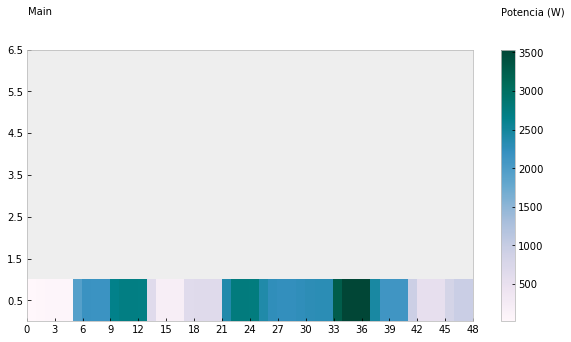

In [17]:
import numpy as np
import pandas as pd

d=elec[1].power_series_all_data(sample_period=60, resample_kwargs={'how': 'mean'}).to_frame()
d.fillna(0,inplace=True)

#tomamos la potencia activa como referencia
d.columns=['active']

#indices para la consulta
d['weekday']=d.index.weekday
d['time']=d.index.time

matrix=d.groupby(['weekday','time']).active.mean().unstack().values

plt.figure(figsize=(10, 5))
ax = plt.gca()
plt.pcolor(matrix,cmap='PuBuGn')
plt.xlim([0,48])
ax.set_xticks(np.arange(0,49,3))

ax.set_yticks(np.arange(0.5,7))

plt.colorbar()
ax.text(0.1, 7.4, 'Main', ha='left', va='center')
ax.text(51, 7.4, 'Potencia (W)', ha='left', va='center') 

plt.savefig('./data/images/2.13_Use_power1.svg', bbox_inches='tight', transparent=True)
plt.show()

### Energy Statistics

Calculation of total energy, that is, active, reactive and apparent power.

In [18]:
elec[1].total_energy()

reactive    0.324430
apparent    7.707773
active      7.669096
dtype: float64

Energy calculation (active power) by meters

In [19]:
#energía por submedidor kwH diaria promedio
d1=elec.energy_per_meter(ac_type=['active'], per_period='H').round(2) # kWh, per_period='D'
#energía por submedidor kwH semanal promedio
d2=elec.energy_per_meter(ac_type=['active'], per_period='D').round(2) # kWh, per_period='W'

#energía por submedidor kwH total
#d3=elec.energy_per_meter(ac_type=['active']).round(2) # kWh, per_period='D'
d3=elec.energy_per_meter(ac_type=['active'], per_period='D').round(2) # kWh, per_period='D'


df=d1.append([d2,d3]).drop(index=['apparent', 'reactive']).transpose()
df.index = [list(labels['Meters'])]
df.columns = ['kWh Hora','kWh Dia.','Total kWh']
df

11/11 ElecMeter(instance=11, building=1, dataset='dsualmh', appliances=[Appliance(type='freezer', instance=1)])instance=1)])

,kWh Hora,kWh Dia.,Total kWh
Main,1.90,45.69,45.69
Electric furnace,0.74,17.88,17.88
Microwave,0.10,2.49,2.49
Television,0.02,0.45,0.45
Incandescent lamp,0.05,1.15,1.15
Vacuum cleaner,0.21,4.96,4.96
Electric space heater,0.25,6.03,6.03
Electric shower heater,0.36,8.70,8.70
Fan,0.02,0.59,0.59
Fridge,0.03,0.72,0.72


### Proportion of submetered energy relative to aggregate measurement

The original proportion_of_energy_submetered function has been modified to correctly represent the labels, giving way to proportion_of_energy_submetered_2 where the main meter and submeters can be specified separately. This function is integrated into metergroup.py stored in users\USER\anaconda3\envs\nilmtk-env\Lib\site-packages\nilmtk\metergroup.py

In [20]:
Devices=elec.select(instance=[1,2,3,4,5,6,7,8,9,10,11]) #MeterGroup de dispositivos
elec.proportion_of_energy_submetered_2(elec[1], Devices, ac_type='active')

Running MeterGroup.proportion_of_energy_submetered...


1.954430731771429

In [21]:
Devices=elec.select(instance=[1,2,3,4,5,6,7,8,9,10,11]) #MeterGroup de dispositivos
elec.proportion_of_energy_submetered_2(elec[1], Devices, ac_type='reactive')

Running MeterGroup.proportion_of_energy_submetered...


2.04536173040475

In [22]:
Devices=elec.select(instance=[1,2,3,4,5,6,7,8,9,10,11]) #MeterGroup de dispositivos
elec.proportion_of_energy_submetered_2(elec[1], Devices, ac_type='apparent')

Running MeterGroup.proportion_of_energy_submetered...


1.959555574994106

### Dataset Summary
NILMTK provides a function that allows obtaining a summary of a MeterGroup based on the meters it contains. This function encompasses several of the functions that have been executed previously.

In [23]:
elec.describe(elec.select(instance=[2,3,4,5,6,7,8,9,10,11]))

Running MeterGroup.correlation_of_sum_of_submeters_with_mains...
Loading data for meter ElecMeterID(instance=11, building=1, dataset='dsualmh')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=11, building=1, dataset='dsualmh')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=11, building=1, dataset='dsualmh')     
Done loading data all meters for this chunk.
Running MeterGroup.proportion_of_energy_submetered...
Calculating dropout_rate for ElecMeterID(instance=11, building=1, dataset='dsualmh') ...   

total_n_meters                                                                               11
total_n_site_meters                                                                           1
correlation_of_sum_of_submeters_with_mains                                              0.99081
proportion_of_energy_submetered                                                        0.959556
dropout_rates_ignoring_gaps                                          min=0.0, mean=0.0, max=0.0
mains_sample_period                                                                          60
submeter_sample_period                                                                       60
timeframe                                     start=2023-06-09 09:34:38+02:00, end=2023-06-0...
total_duration                                                                  0 days 04:01:41
mains_uptime                                                                    0 days 04:01:41
proportion_uptime                       

### correlation_of_sum_of_submeters_with_mains

The returned value "0.99081" in the context of NILMTK (Non-Intrusive Load Monitoring Toolkit) indicates the correlation between the sum of the submeters and the main power supply. The correlation between the sum of submeters and main power is a measure of how well the submeters are capturing the total energy consumption of the system.

A correlation value of 1 indicates perfect correlation, meaning the submeters are completely capturing the total energy consumption. In this case, the correlation value of 0.99081 indicates there is a high correlation between the sum of submeters and main power, suggesting the submeters are capturing most of the total energy consumption, but there may be a small discrepancy.

### proportion_of_energy_submetered

In NILMTK, the returned value "0.959556" for the "proportion_of_energy_submetered" metric means the proportion of energy that has been measured using submeters compared to the total energy consumed in the system.

This metric is useful for evaluating the performance of electrical load disaggregation performed by NILMTK. A value of 1 would indicate that all devices are being correctly measured and disaggregated by the submeters, meaning the entirety of consumed energy has been captured. A value less than 1 indicates that there is a portion of energy not being measured by the submeters and therefore not correctly disaggregated.

In this case, the value of "0.959556" suggests that approximately 95.96% of the total energy consumed in the system has been measured and disaggregated using submeters. This indicates that load disaggregation is working efficiently, but there still exists a small proportion of energy that has not been captured or disaggregated by the submeters.

### dropout_rates_ignoring_gaps

In NILMTK, the "dropout_rates_ignoring_gaps" metric with values "min=0.0, mean=0.0, max=0.0" indicates the rate of dropouts (missing values) in the electrical load data, ignoring gaps between measurements.

In the context of electrical load monitoring, "dropouts" refer to missing or absent values in the recorded data. These can be caused by measurement interruptions, measurement device failures, or any other technical issues. Gaps in the data refer to time intervals where no measurement was recorded.

In this case, the values "min=0.0, mean=0.0, max=0.0" indicate that no dropouts have been found in the electrical load data, or in other words, no missing values have been recorded. The dropout rate is minimal (0.0) in both the minimum and maximum values, and the mean is also 0.0, suggesting that the electrical load data is complete and there are no significant gaps in the measurements. This is a good indication of the quality and integrity of the data used in the analysis or electrical load disaggregation performed with NILMTK.
